In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(11239, 13)

In [9]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df['Amount'] = df['Amount'].astype(int)

### Gender

In [11]:
Revenue_from_f_cust = (df[df['Gender'] == 'F']['Amount'].sum()/df['Amount'].sum())*100
Revenue_from_m_cust = (df[df['Gender'] == 'M']['Amount'].sum()/df['Amount'].sum())*100

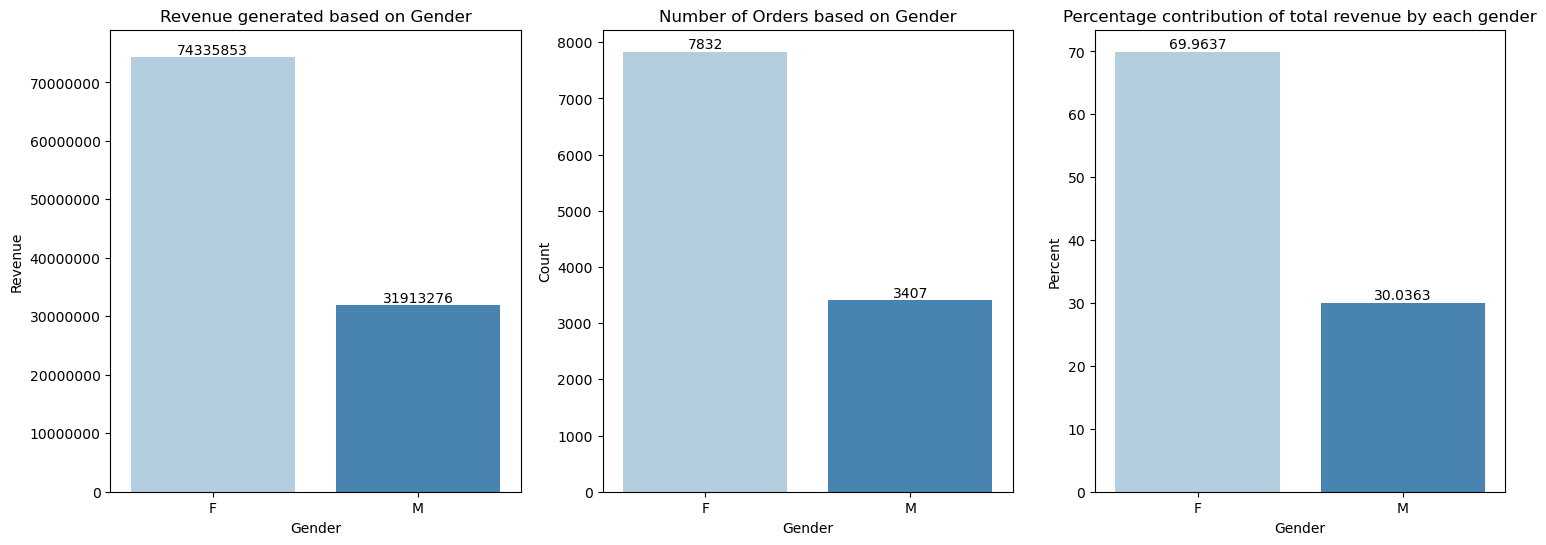

In [12]:
plt.subplots(1,3, figsize = (18,6))
plt.subplot(1,3,1)
ax = sns.barplot(x=df['Gender'],y = df['Amount'],estimator=np.sum,palette='Blues',errwidth=0)
ax.bar_label(ax.containers[0],labels=[f'{i.get_height():.0f}' for i in ax.containers[0]])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Revenue generated based on Gender')
plt.ylabel('Revenue')


plt.subplot(1,3,2)
ax = sns.countplot(x=df['Gender'],palette="Blues")
for i in ax.containers:
    ax.bar_label(i)
plt.title('Number of Orders based on Gender')
plt.ylabel('Count')



plt.subplot(1,3,3)
ax = sns.barplot(x = ['F','M'],y=[Revenue_from_f_cust,Revenue_from_m_cust],palette='Blues')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Percentage contribution of total revenue by each gender')
plt.xlabel('Gender')
plt.ylabel('Percent')
plt.show()

#### Above charts/graphs conclude that Females in general have placed more orders then Men.<br>Approximately 70% of total revenue is generated from female customers

### Age

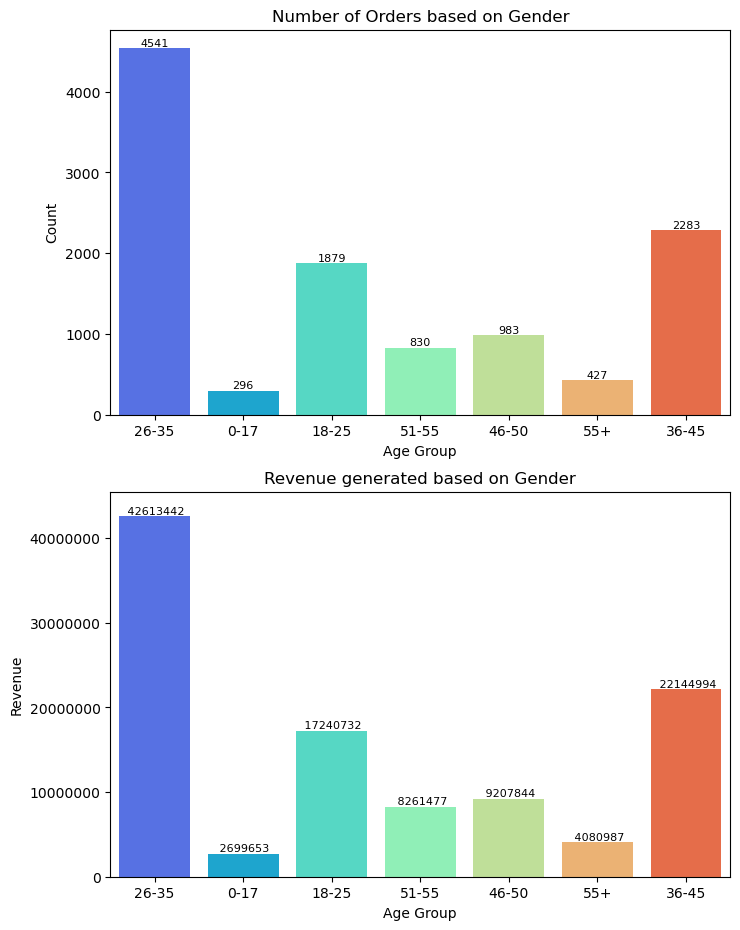

In [13]:
plt.subplots(2,1, figsize = (8,11))
plt.subplot(2,1,1)
ax = sns.countplot(x=df['Age Group'],palette='rainbow')
for i in ax.containers:
    ax.bar_label(i, fontsize = 8)
plt.title('Number of Orders based on Gender')
plt.ylabel('Count')


plt.subplot(2,1,2)
ax = sns.barplot(x = df['Age Group'], y = df['Amount'], estimator=np.sum,errwidth=0,palette='rainbow')
plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Revenue generated based on Gender')
plt.ylabel('Revenue')
ax.bar_label(ax.containers[0],labels =  [f'{x.get_height() : .0f}' for x in ax.containers[0]], fontsize = 8)

plt.show()

#### From the above graphs, we can conclude that age group of 26-35 have contributed the most in total revenue by generating approximately 4.2M 

### State

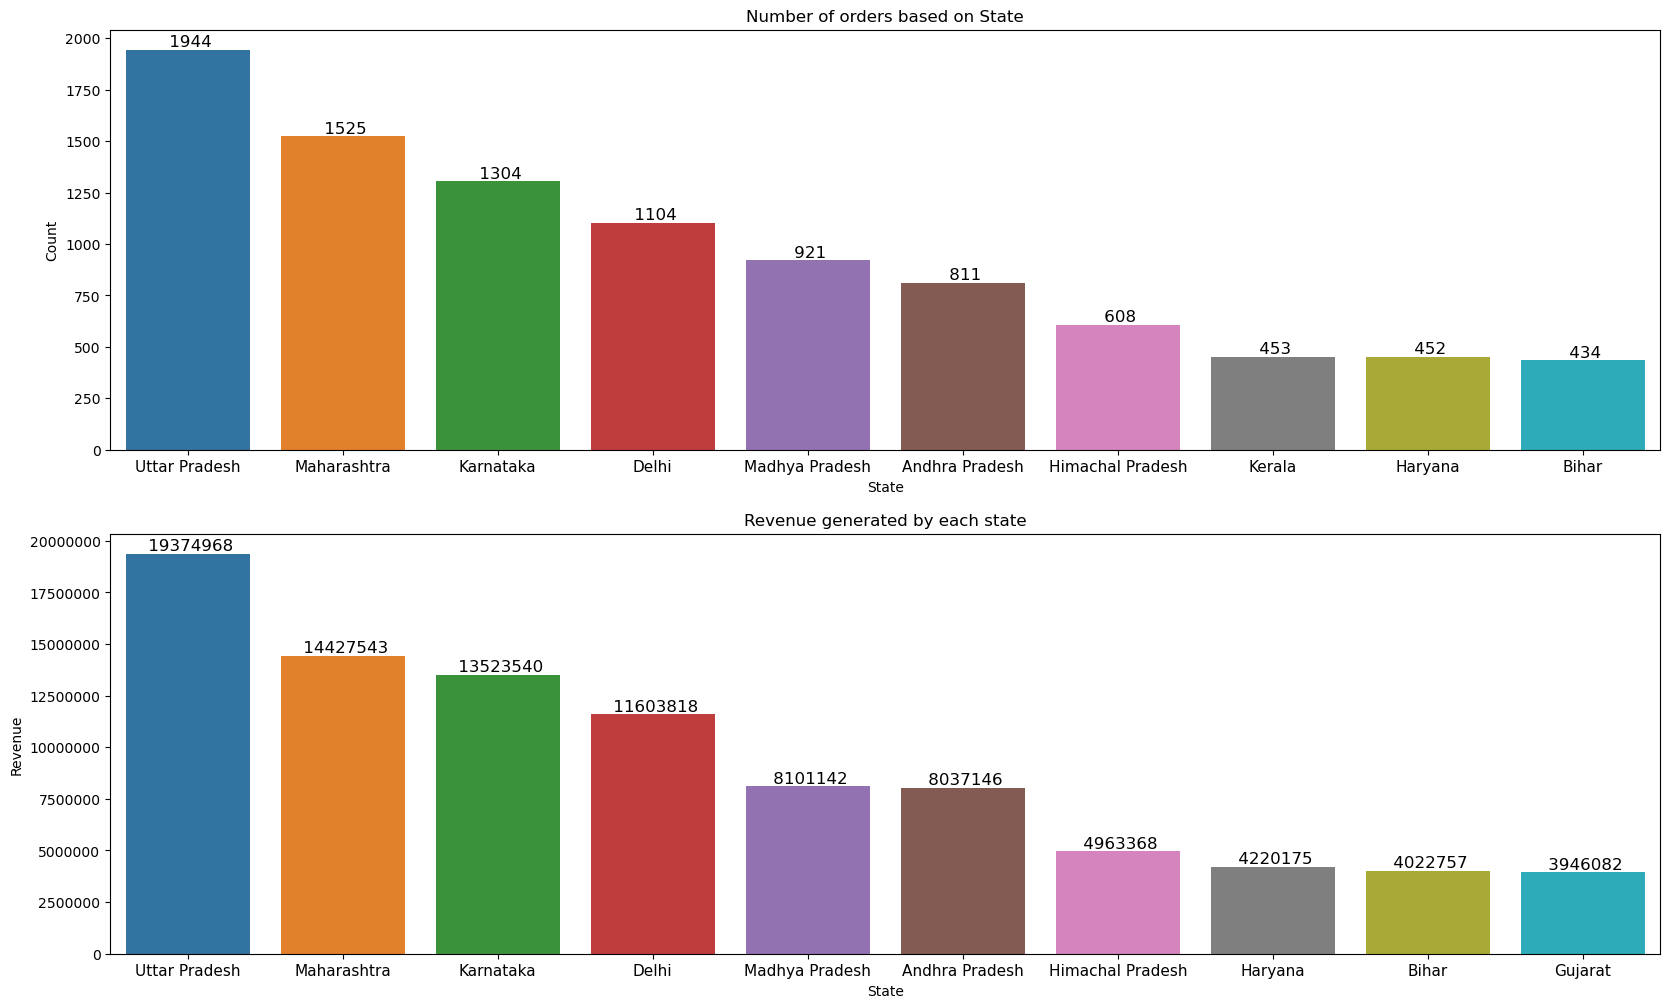

In [14]:
plt.subplots(2,1, figsize = (20,12))

state_cnt = df.groupby('State',as_index=False)['User_ID'].count()
state_cnt = state_cnt.sort_values(by = 'User_ID', ascending=False).head(10)

plt.subplot(2,1,1)
ax = sns.barplot(x = state_cnt['State'] , y = state_cnt['User_ID'])
plt.ticklabel_format(style='plain', axis = 'y')
plt.tick_params(axis='x', labelsize=11)
plt.ylabel('Count')
plt.title('Number of orders based on State')
ax.bar_label(ax.containers[0],labels = [ f'{x.get_height() : .0f}' for x in ax.containers[0] ], fontsize =12)



state_rev = df.groupby('State',as_index=False)['Amount'].sum()
state_rev = state_rev.sort_values(by = 'Amount', ascending=False).head(10)

plt.subplot(2,1,2)
ax = sns.barplot(x = state_rev['State'] , y = state_rev['Amount'])
plt.ticklabel_format(style='plain', axis = 'y')
plt.tick_params(axis='x', labelsize=11)
ax.bar_label(ax.containers[0],labels = [ f'{x.get_height() : .0f}' for x in ax.containers[0] ], fontsize = 12)
plt.ylabel('Revenue')
plt.title('Revenue generated by each state')
plt.show()

#### By observing above graphs/charts we can conclude that maximum orders and revenue is generated from the state of Uttar Pradesh followed by Maharashta and Karnataka

### Product Categories

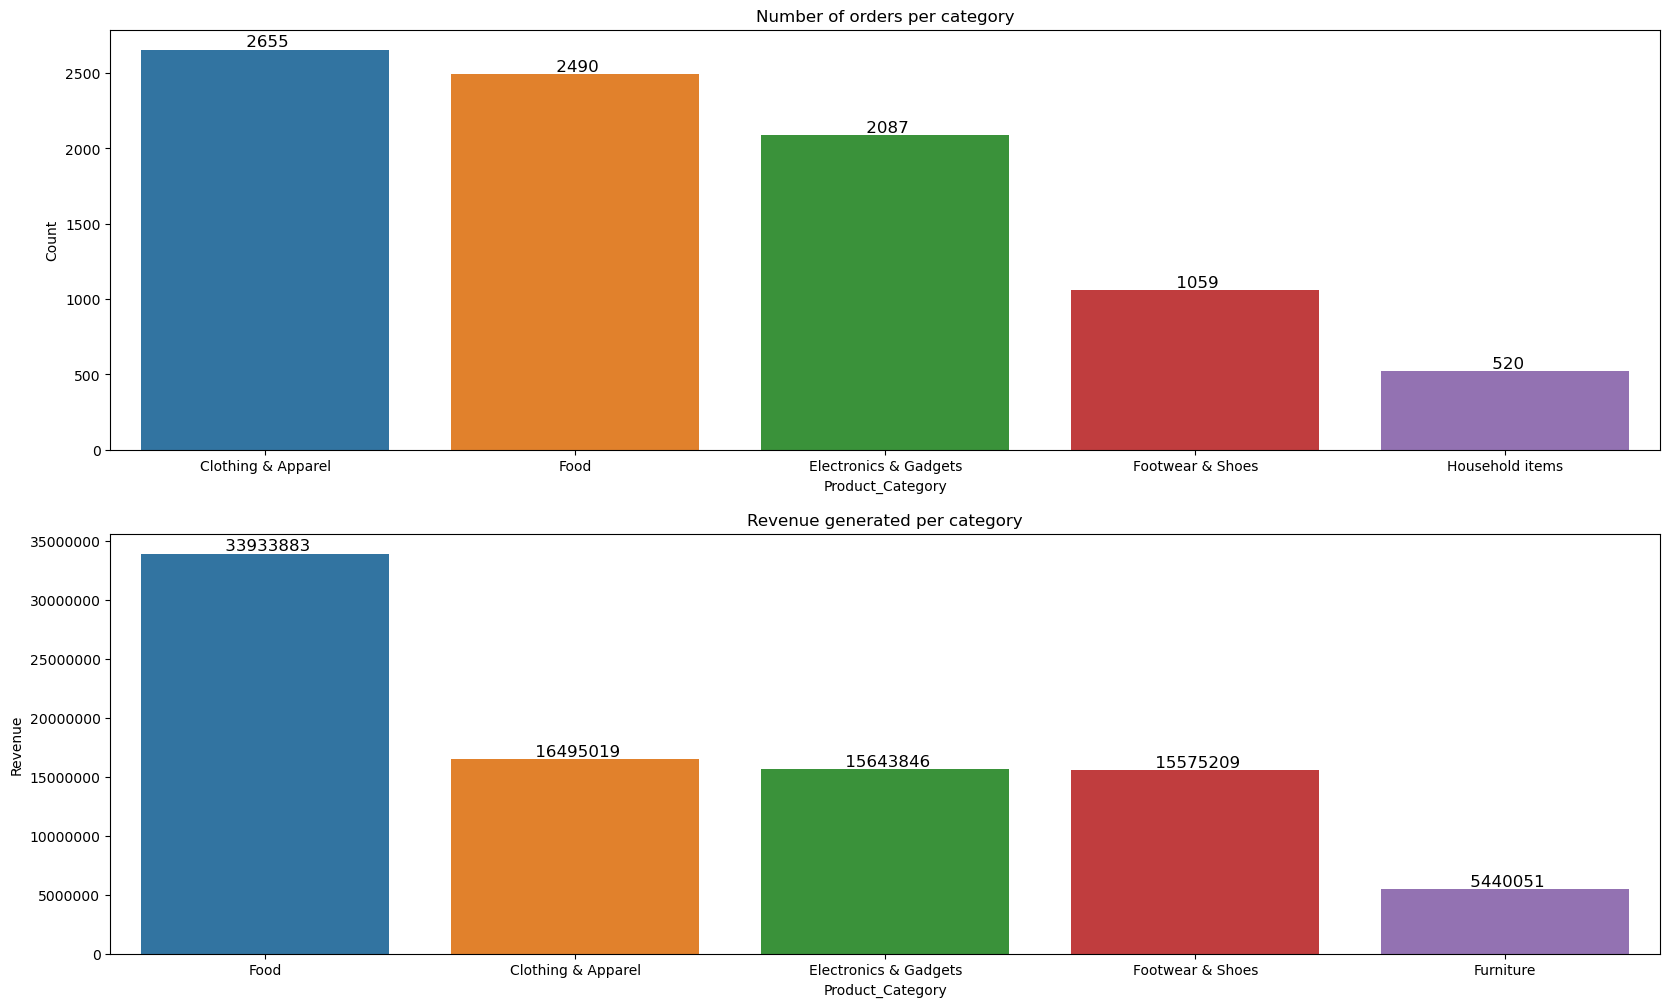

In [15]:
plt.subplots(2,1, figsize = (20,12))

state_cnt = df.groupby('Product_Category',as_index=False)['User_ID'].count()
state_cnt = state_cnt.sort_values(by = 'User_ID', ascending=False).head()

plt.subplot(2,1,1)
ax = sns.barplot(x = state_cnt['Product_Category'] , y = state_cnt['User_ID'])
plt.ticklabel_format(style='plain', axis = 'y')
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Count')
plt.title('Number of orders per category')
ax.bar_label(ax.containers[0],labels = [ f'{x.get_height() : .0f}' for x in ax.containers[0] ], fontsize =12)



state_rev = df.groupby('Product_Category',as_index=False)['Amount'].sum()
state_rev = state_rev.sort_values(by = 'Amount', ascending=False).head()

plt.subplot(2,1,2)
ax = sns.barplot(x = state_rev['Product_Category'] , y = state_rev['Amount'])
plt.ticklabel_format(style='plain', axis = 'y')
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Revenue')
ax.bar_label(ax.containers[0],labels = [ f'{x.get_height() : .0f}' for x in ax.containers[0] ], fontsize = 12)
plt.title('Revenue generated per category')
plt.show()

#### From above charts/graphs we can conclude that category with most number of orders is Clothing & Apparel followed by Food, However Food is the category from where maximum amount is generated